# AC Motor
## 1. 데이터 확인

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('./data/Vibration_10k_20210810.csv')
df.head()

,Date,Filename,Label_No,Label,Motor,WATT,AMP,AbsMax,AbsMean,P2P,...,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
0,2020-12-22 12:51:00,STFMK-20201105-LW19-2505_20201222_125100_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.026590,0.005515,0.050972,...,1.251851,4.821622,0.000473,0.000134,0.000471,0.000063,0.000912,0.001581,0.005084,0.000166
1,2020-12-01 16:48:26,STFMK-20201105-LW19-2505_20201201_164826_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.028149,0.005643,0.054799,...,1.246948,4.988097,0.000406,0.000369,0.000226,0.000100,0.000254,0.000652,0.000338,0.000806
2,2020-12-01 14:58:56,STFMK-20201105-LW19-2505_20201201_145856_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.030902,0.005924,0.056936,...,1.252201,5.216847,0.000455,0.000190,0.000210,0.000086,0.000417,0.001986,0.003727,0.000164
3,2020-12-02 14:45:53,STFMK-20201105-LW19-2505_20201202_144553_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.026827,0.006019,0.053333,...,1.243275,4.456839,0.000491,0.000251,0.000338,0.000080,0.000452,0.000269,0.006807,0.000222
4,2020-12-02 15:53:20,STFMK-20201105-LW19-2505_20201202_155320_004.dat,3,축정렬불량,R-PAC-01R,3.75,7.7,0.028728,0.005612,0.054520,...,1.251593,5.118594,0.000323,0.000321,0.000362,0.000045,0.000358,0.001625,0.003675,0.000164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      10000 non-null  object 
 1   Filename  10000 non-null  object 
 2   Label_No  10000 non-null  int64  
 3   Label     10000 non-null  object 
 4   Motor     10000 non-null  object 
 5   WATT      10000 non-null  float64
 6   AMP       10000 non-null  float64
 7   AbsMax    10000 non-null  float64
 8   AbsMean   10000 non-null  float64
 9   P2P       10000 non-null  float64
 10  RMS       10000 non-null  float64
 11  Skewness  10000 non-null  float64
 12  Kurtosis  10000 non-null  float64
 13  Crest     10000 non-null  float64
 14  Shape     10000 non-null  float64
 15  Impulse   10000 non-null  float64
 16  1x        10000 non-null  float64
 17  2x        10000 non-null  float64
 18  3x        10000 non-null  float64
 19  4x        10000 non-null  float64
 20  1xB       10000 non-null  flo

## 2. EDA

In [4]:
df['Label_No'].value_counts()

0    4612
4    1654
3    1337
1    1243
2    1154
Name: Label_No, dtype: int64

In [5]:
df['WATT'].value_counts().sort_index()

2.20     2092
3.70     1201
3.75      308
5.50     1242
7.50      121
11.00    1358
15.00     841
18.50     714
22.00     854
30.00     253
37.00     323
55.00     693
Name: WATT, dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df = df.set_index('Date').sort_index()
df.head()

,Filename,Label_No,Label,Motor,WATT,AMP,AbsMax,AbsMean,P2P,RMS,...,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,STFMK-20201105-LW19-3423_20201125_140100_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.054116,0.011482,0.092395,0.014053,...,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,STFMK-20201105-LW19-3423_20201125_140506_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.051435,0.011649,0.088863,0.014295,...,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,STFMK-20201105-LW19-3423_20201125_140612_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.046130,0.012619,0.085221,0.015276,...,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,STFMK-20201105-LW19-3423_20201125_140624_004.dat,0,정상,L-CAHU-03R,11.0,22.0,0.053497,0.011505,0.093581,0.014059,...,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,STFMK-20201105-LW19-3054_20201125_140703_004.dat,0,정상,L-PAHU-02S,37.0,71.1,0.073671,0.014504,0.123645,0.017763,...,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496


In [7]:
df.drop(['Filename', 'Label', 'Motor'], axis=1, inplace=True)
df.head()

,Label_No,WATT,AMP,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,0,11.0,22.0,0.054116,0.011482,0.092395,0.014053,-0.142563,2.606448,6.574603,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,0,11.0,22.0,0.051435,0.011649,0.088863,0.014295,-0.129078,2.538691,6.216188,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,0,11.0,22.0,0.046130,0.012619,0.085221,0.015276,-0.144933,2.386880,5.578775,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,0,11.0,22.0,0.053497,0.011505,0.093581,0.014059,-0.124687,2.511421,6.656225,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,0,37.0,71.1,0.073671,0.014504,0.123645,0.017763,-0.180152,2.612526,6.960855,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496


In [8]:
corr = df.corr()

<AxesSubplot:>

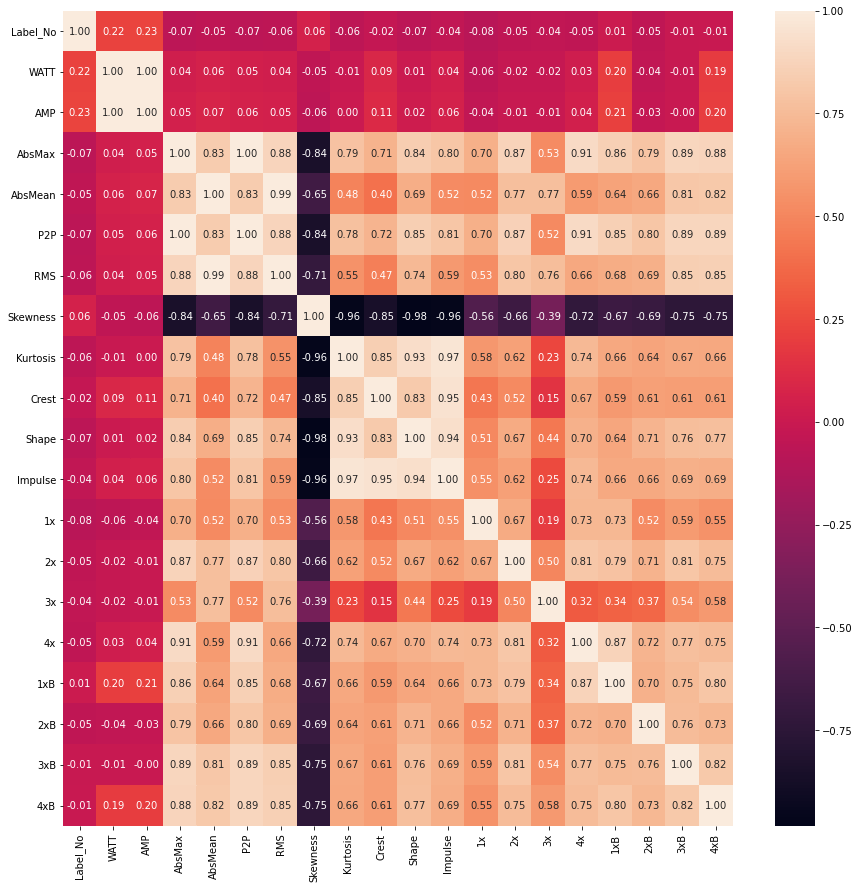

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, fmt='.2f')

## 3. 학습

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('Label_No', axis=1)
y = df['Label_No']

# Standardization
X = (X - X.mean()) / X.std()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 19)
(3000, 19)
(7000,)
(3000,)


### 3-1. XGB Classifier

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_accu = accuracy_score(y_test, xgb_pred)

print('Accuracy : ', xgb_accu)
print(classification_report(y_test, xgb_pred))

[11:01:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.998
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       1.00      1.00      1.00       372
           2       1.00      1.00      1.00       351
           3       0.99      1.00      0.99       396
           4       1.00      1.00      1.00       492

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



### + Multi Classification Report

In [12]:
y_pred = xgb.predict(X_test)
target_names = ['0', '1', '2', '3', '4']
print('##', XGBClassifier)
print(classification_report(y_test, y_pred, target_names=target_names, digits=4)) 

## <class 'xgboost.sklearn.XGBClassifier'>
              precision    recall  f1-score   support

           0     0.9986    0.9971    0.9978      1389
           1     1.0000    1.0000    1.0000       372
           2     1.0000    1.0000    1.0000       351
           3     0.9900    1.0000    0.9950       396
           4     1.0000    0.9959    0.9980       492

    accuracy                         0.9980      3000
   macro avg     0.9977    0.9986    0.9982      3000
weighted avg     0.9980    0.9980    0.9980      3000



### 3-2. LSTM Autoencoder

In [13]:
# 정상 데이터만 추출
df_ok = df.loc[df['Label_No'] == 0].iloc[:, 1:]
df_ok

,WATT,AMP,AbsMax,AbsMean,P2P,RMS,Skewness,Kurtosis,Crest,Shape,Impulse,1x,2x,3x,4x,1xB,2xB,3xB,4xB
Date,,,,,,,,,,,,,,,,,,,
2020-11-25 14:01:00,11.0,22.0,0.054116,0.011482,0.092395,0.014053,-0.142563,2.606448,6.574603,1.223906,4.713012,0.021590,0.002832,0.000747,0.000476,0.000814,0.000405,0.000370,0.000278
2020-11-25 14:05:06,11.0,22.0,0.051435,0.011649,0.088863,0.014295,-0.129078,2.538691,6.216188,1.227197,4.415492,0.021702,0.002757,0.000674,0.000674,0.000993,0.000407,0.000258,0.000224
2020-11-25 14:06:12,11.0,22.0,0.046130,0.012619,0.085221,0.015276,-0.144933,2.386880,5.578775,1.210515,3.655473,0.021162,0.002808,0.000938,0.000420,0.000507,0.000395,0.000217,0.000176
2020-11-25 14:06:24,11.0,22.0,0.053497,0.011505,0.093581,0.014059,-0.124687,2.511421,6.656225,1.221968,4.649777,0.021820,0.002246,0.000765,0.000583,0.000961,0.000614,0.000276,0.000347
2020-11-25 14:07:03,37.0,71.1,0.073671,0.014504,0.123645,0.017763,-0.180152,2.612526,6.960855,1.224668,5.079276,0.000268,0.002277,0.000215,0.000851,0.000442,0.000774,0.000115,0.000496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-26 13:56:08,11.0,22.0,0.051351,0.010746,0.090373,0.013122,-0.102131,2.547163,6.887367,1.221062,4.778596,0.019273,0.004546,0.000335,0.000637,0.000579,0.001220,0.000239,0.000162
2020-12-26 14:56:32,11.0,22.0,0.049762,0.011479,0.093155,0.014009,-0.139252,2.542827,6.649879,1.220337,4.334970,0.021180,0.004645,0.000446,0.000323,0.000751,0.000996,0.000346,0.000183
2020-12-26 15:53:21,11.0,22.0,0.050011,0.011062,0.090215,0.013480,-0.109898,2.535240,6.692540,1.218612,4.521061,0.020287,0.004590,0.000396,0.000633,0.000488,0.000621,0.000225,0.000317


In [14]:
mean = df_ok.mean()
std = df_ok.std()
train = (df_ok - mean) / std
train.shape

(4612, 19)

In [15]:
# 모델에서 사용할 시퀀스 생성 (차수변경)
def create_sequences(values, time_steps=60):
    output = []
    for i in range(len(values) - time_steps):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)

train = create_sequences(train)
print(train.shape)

(4552, 60, 19)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *

model = Sequential()
model.add(LSTM(100, 
               input_shape=(train.shape[1], train.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(RepeatVector(train.shape[1]))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               48000     
_________________________________________________________________
repeat_vector (RepeatVector) (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            30200     
_________________________________________________________________
time_distributed (TimeDistri (None, 60, 1)             51        
Total params: 78,251
Trainable params: 78,251
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

model.compile(optimizer='adam',loss='mse')

history = model.fit(train, train, epochs=100, batch_size=200,
          validation_split=0.1, callbacks=[early_stop])

Epoch 1/100
21/21 [==============================] - 4s 131ms/step - loss: 0.9791 - val_loss: 0.9103
Epoch 2/100
21/21 [==============================] - 2s 119ms/step - loss: 0.9689 - val_loss: 0.9115
Epoch 3/100
21/21 [==============================] - 3s 119ms/step - loss: 0.9678 - val_loss: 0.9123
Epoch 4/100
21/21 [==============================] - 2s 118ms/step - loss: 0.9671 - val_loss: 0.9150
Epoch 5/100
21/21 [==============================] - 2s 119ms/step - loss: 0.9667 - val_loss: 0.9098
Epoch 6/100
21/21 [==============================] - 2s 117ms/step - loss: 0.9660 - val_loss: 0.9100
Epoch 7/100
21/21 [==============================] - 2s 118ms/step - loss: 0.9660 - val_loss: 0.8991
Epoch 8/100
21/21 [==============================] - 2s 117ms/step - loss: 0.9658 - val_loss: 0.8981
Epoch 9/100
21/21 [==============================] - 2s 117ms/step - loss: 0.9651 - val_loss: 0.8984
Epoch 10/100
21/21 [==============================] - 2s 117ms/step - loss: 0.9652 - val_lo

In [18]:
train_pred = model.predict(train)
train_mae = np.mean(np.abs(train_pred - train), axis=1)
threshold = np.max(train_mae)
print("오류 임계치 최댓값 : ", threshold)

오류 임계치 최댓값 :  2.2555080921495057


In [19]:
df_test = (X_test - X_test.mean()) / X_test.std()
print("train.shape : ", train.shape)
test = create_sequences(df_test)
print("test.shape : ", test.shape)

train.shape :  (4552, 60, 19)
test.shape :  (2940, 60, 19)


오류 임계치 최댓값 :  1.1200988538074652
오류 임계치 평균값 :  0.5206026648782762


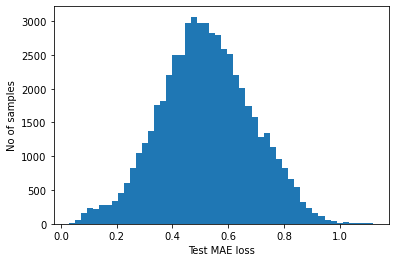

In [20]:
test_pred = model.predict(test, verbose=0)
test_mae = np.mean(np.abs(test_pred - test), axis=1)
test_mae = test_mae.reshape((-1))

threshold = np.max(test_mae)
print("오류 임계치 최댓값 : ", threshold)
print("오류 임계치 평균값 : ", np.mean(test_mae))

plt.hist(test_mae, bins=50)
plt.xlabel("Test MAE loss")
plt.ylabel("No of samples")
plt.show()

In [21]:
threshold = 1
anomalies = test_mae > threshold
normal = test_mae <= threshold
print("이상치 데이터 : ", np.sum(anomalies))
print("정상 데이터 : ", np.sum(normal))

이상치 데이터 :  72
정상 데이터 :  55788


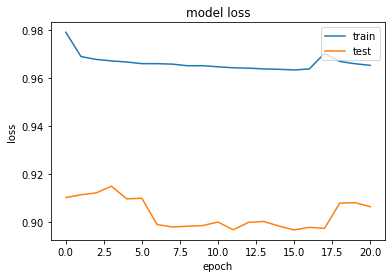

In [29]:
import matplotlib.pyplot as plt

#평가
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')